**Model**

In [7]:
!pip install mediapipe

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install playsound

In [10]:
import os
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle

#classifiers import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#tf imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D, LSTM, BatchNormalization

import playsound

#media pipe draw funcs
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic


In [11]:
df = pd.read_csv('drive/My Drive/coords_4.csv') #dataset use via drive

In [ ]:
df = pd.read_csv('coords_4.csv') #dataset use if uploaded

In [13]:
X = df.drop('class', axis=1) 
y = df['class'] 

In [14]:
df.head

<bound method NDFrame.head of       class     lh_x1     lh_y1  lh_z1  ...    rh_z20    rh_x21    rh_y21    rh_z21
0     Hello  0.000000  0.000000    0.0  ... -0.047686  0.316787  0.362292 -0.049313
1     Hello  0.000000  0.000000    0.0  ... -0.036616  0.309902  0.344695 -0.038280
2     Hello  0.000000  0.000000    0.0  ...  0.000000  0.000000  0.000000  0.000000
3     Hello  0.000000  0.000000    0.0  ... -0.065204  0.228751  0.301018 -0.064043
4     Hello  0.000000  0.000000    0.0  ... -0.057896  0.128779  0.283602 -0.058639
..      ...       ...       ...    ...  ...       ...       ...       ...       ...
645  assist  0.576794  0.782922    0.0  ... -0.036858  0.548728  0.883595 -0.046602
646  assist  0.571372  0.798020    0.0  ... -0.001327  0.516381  0.888949 -0.002754
647  assist  0.577747  0.780080    0.0  ... -0.023590  0.528279  0.901635 -0.029024
648  assist  0.594442  0.762858    0.0  ... -0.019895  0.522156  0.909827 -0.026114
649  assist  0.590657  0.750188    0.0  ... -0

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [16]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [17]:
y.unique().shape[0]

7

In [18]:
X.shape

(650, 126)

In [19]:
pipelines = {
    'lr':make_pipeline(RobustScaler(), LogisticRegression(solver='lbfgs', max_iter=1000)),
    'rc':make_pipeline(RobustScaler(), RidgeClassifier()),
    'svc':make_pipeline(RobustScaler(), SVC()),
    'xgb':make_pipeline(RobustScaler(), XGBClassifier()),
    'rf':make_pipeline(RobustScaler(), RandomForestClassifier()),
    'gb':make_pipeline(RobustScaler(), GradientBoostingClassifier())
}

In [21]:
fit_models = {}
for cal, pipe in pipelines.items():
    pipem = pipe.fit(X_train, y_train)
    fit_models[cal] = pipem

In [22]:
fit_models

{'gb': Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'lr': Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'svc': Pipeline(steps=[('robustscaler', RobustScaler()), ('svc', SVC())]),
 'xgb': Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('xgbclassifier', XGBClassifier(objective='multi:softprob'))])}

Accuracy result

In [35]:
for cal, model in fit_models.items():
    yv = model.predict(X_test)
    print(f"Model: {cal} : {round(accuracy_score(y_test, yv),5)}  {round(accuracy_score(y_test, yv) * 100, 3)}%")

Model: lr : 0.92308  92.308%
Model: rc : 0.94359  94.359%
Model: svc : 0.92308  92.308%
Model: xgb : 0.92308  92.308%
Model: rf : 0.92308  92.308%
Model: gb : 0.93846  93.846%


Confusion matrix for all classifiers with report

In [25]:
def fit_predict(model,X_test, y_test):
    y_pred=model.predict(X_test)
    print(f"Model name: { type(model.steps[1][1]).__name__}" )
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=fit_models['gb'].classes_).plot(cmap='viridis')
    plt.title(f'Confusion matrix of {model} model on test data')
    plt.show()

#logistic regression

Model name: LogisticRegression
Accuracy score: 0.9230769230769231
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       0.83      0.67      0.74        15
           I       1.00      1.00      1.00        18
      assist       0.95      0.95      0.95        44
      people       0.97      0.95      0.96        37
          to       1.00      0.95      0.98        44
        want       1.00      0.82      0.90        22

    accuracy                           0.92       195
   macro avg       0.91      0.91      0.90       195
weighted avg       0.94      0.92      0.93       195





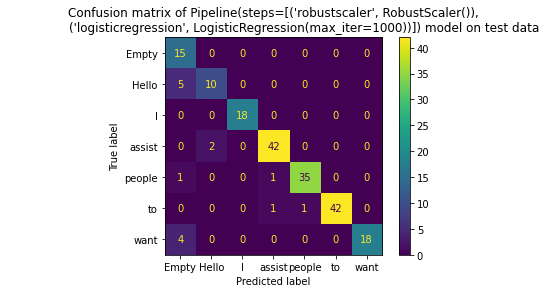

In [26]:
fit_predict(fit_models['lr'], X_test, y_test)

#ridge classifier

Model name: RidgeClassifier
Accuracy score: 0.9435897435897436
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       1.00      1.00      1.00        18
      assist       1.00      1.00      1.00        44
      people       0.97      0.97      0.97        37
          to       1.00      0.98      0.99        44
        want       1.00      0.82      0.90        22

    accuracy                           0.94       195
   macro avg       0.94      0.92      0.92       195
weighted avg       0.96      0.94      0.95       195





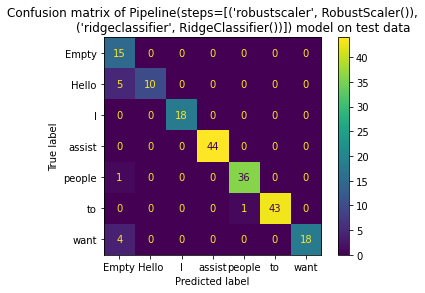

In [27]:
fit_predict(fit_models['rc'], X_test, y_test)

#xgb

Model name: XGBClassifier
Accuracy score: 0.9230769230769231
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       1.00      1.00      1.00        18
      assist       1.00      0.93      0.96        44
      people       0.97      0.95      0.96        37
          to       1.00      0.98      0.99        44
        want       0.82      0.82      0.82        22

    accuracy                           0.92       195
   macro avg       0.91      0.91      0.90       195
weighted avg       0.94      0.92      0.93       195





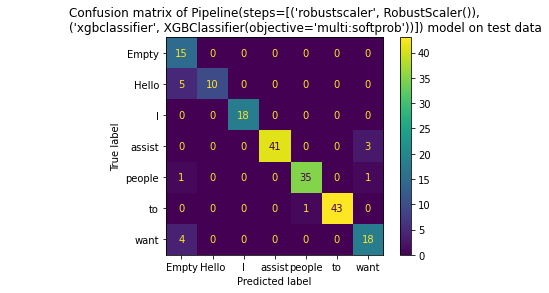

In [28]:
fit_predict(fit_models['xgb'], X_test, y_test)

#gb

Model name: GradientBoostingClassifier
Accuracy score: 0.9384615384615385
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       1.00      1.00      1.00        18
      assist       1.00      1.00      1.00        44
      people       0.97      0.95      0.96        37
          to       1.00      0.98      0.99        44
        want       0.95      0.82      0.88        22

    accuracy                           0.94       195
   macro avg       0.93      0.92      0.91       195
weighted avg       0.96      0.94      0.94       195





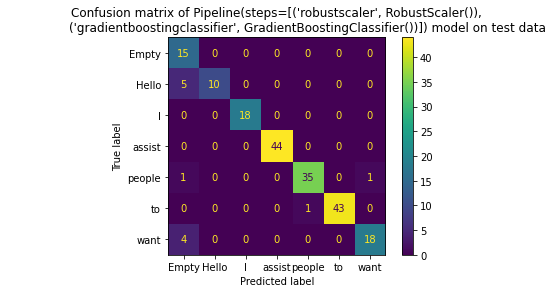

In [29]:
fit_predict(fit_models['gb'], X_test, y_test)

SVC


Model name: SVC
Accuracy score: 0.9230769230769231
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       1.00      1.00      1.00        18
      assist       1.00      0.95      0.98        44
      people       0.97      0.92      0.94        37
          to       1.00      0.98      0.99        44
        want       0.82      0.82      0.82        22

    accuracy                           0.92       195
   macro avg       0.91      0.91      0.90       195
weighted avg       0.94      0.92      0.93       195





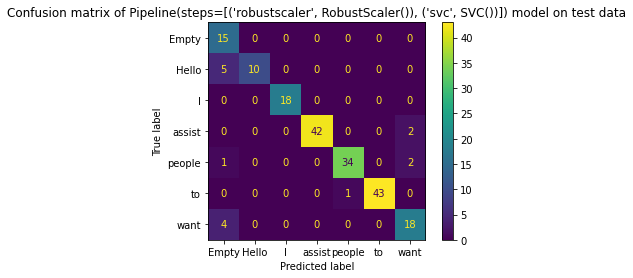

In [30]:
fit_predict(fit_models['svc'], X_test, y_test)

Random Forest 

Model name: RandomForestClassifier
Accuracy score: 0.9230769230769231
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       0.86      1.00      0.92        18
      assist       1.00      0.93      0.96        44
      people       0.97      0.95      0.96        37
          to       1.00      0.98      0.99        44
        want       0.95      0.82      0.88        22

    accuracy                           0.92       195
   macro avg       0.91      0.91      0.89       195
weighted avg       0.94      0.92      0.93       195





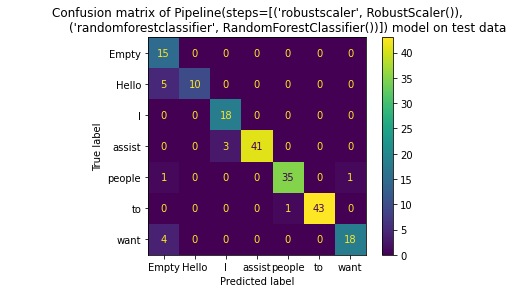

In [31]:
fit_predict(fit_models['rf'], X_test, y_test)

In [32]:
with open('model.pkl', 'wb') as f:
    pickle.dump(fit_models['rc'], f)